 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [31]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [32]:
# Reading whale returns
whale_returns_csv = Path("../Pandas/Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
# whale_returns.describe()
whale_returns.sort_index(ascending = True, inplace = True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [33]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [34]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [35]:
# Reading algorithmic returns
algo_returns_csv = Path("../Pandas/Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
# algo_returns.describe()
algo_returns.sort_index(ascending = True, inplace = True)
algo_returns.head(10)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [36]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [37]:
# Drop nulls
algo_returns.dropna(inplace=True)
algo_returns.isnull().sum()
algo_returns.head(10)

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
2014-06-12,-0.000028,-0.003841
2014-06-13,0.001917,-0.000814
2014-06-16,0.001084,0.001831
2014-06-17,0.000922,0.006870


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [38]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("../Pandas/Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
# sp500_history.describe()
sp500_history.sort_index(ascending = True, inplace = True)
# sp500_history.head(10)
sp500_history.tail(10)

,Close
Date,
2019-04-09,$2878.20
2019-04-10,$2888.21
2019-04-11,$2888.32
2019-04-12,$2907.41
2019-04-15,$2905.58
2019-04-16,$2907.06
2019-04-17,$2900.45
2019-04-18,$2905.03
2019-04-22,$2907.97


In [39]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [40]:
# Fix Data Types
sp500_history["Close"]= sp500_history["Close"].str.replace('$','').astype("float")
sp500_history.sort_index(inplace = True)
sp500_history

<ipython-input-40-bfca993d4a5d>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_history["Close"]= sp500_history["Close"].str.replace('$','').astype("float")


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [74]:
sp500_history.dtypes

Close    float64
dtype: object

In [76]:
# Calculate Daily Returns
daily_returns_sp500 = sp500_history.pct_change()

In [78]:
# Drop nulls
daily_returns_sp500.dropna(inplace = True)
daily_returns_sp500.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [80]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns_sp500.rename(columns={'Close':'SP 500'}, inplace=True)
daily_returns_sp500.head()

,SP 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [84]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_returns, algo_returns, daily_returns_sp500], axis="columns", join="inner")
combined_df.dropna(inplace = True)
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

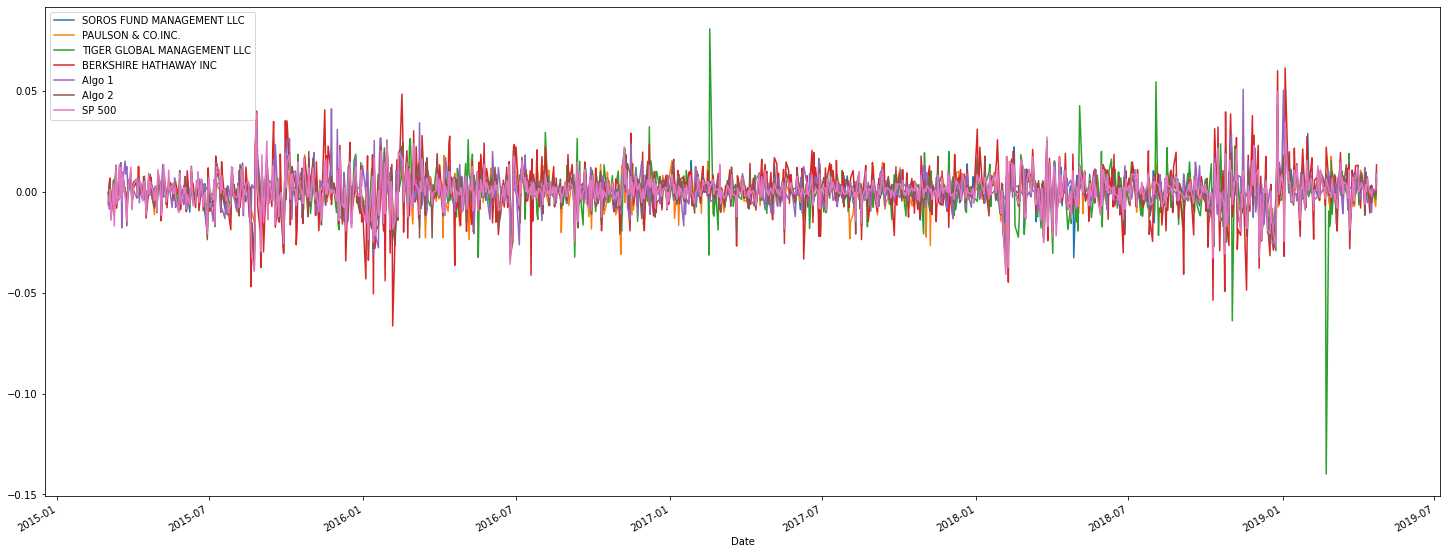

In [86]:
# Plot daily returns of all portfolios
combined_df.plot(figsize = (25,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

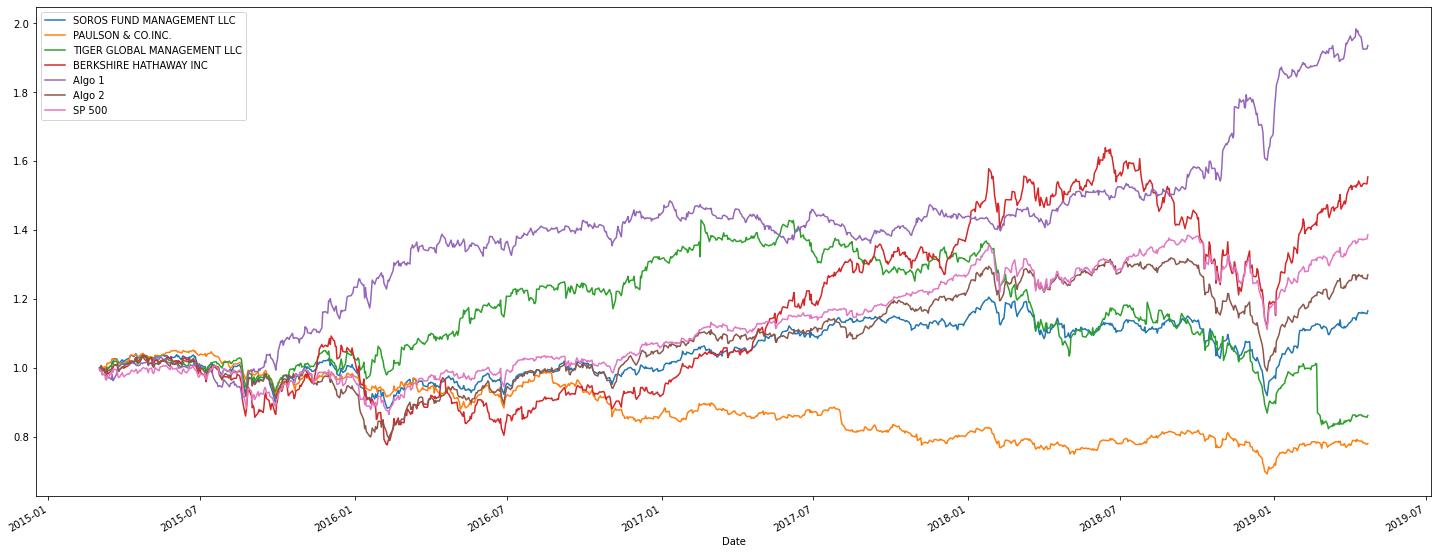

In [88]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod()
cumulative_returns.head()
# Plot cumulative returns
cumulative_returns.plot(figsize = (25,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

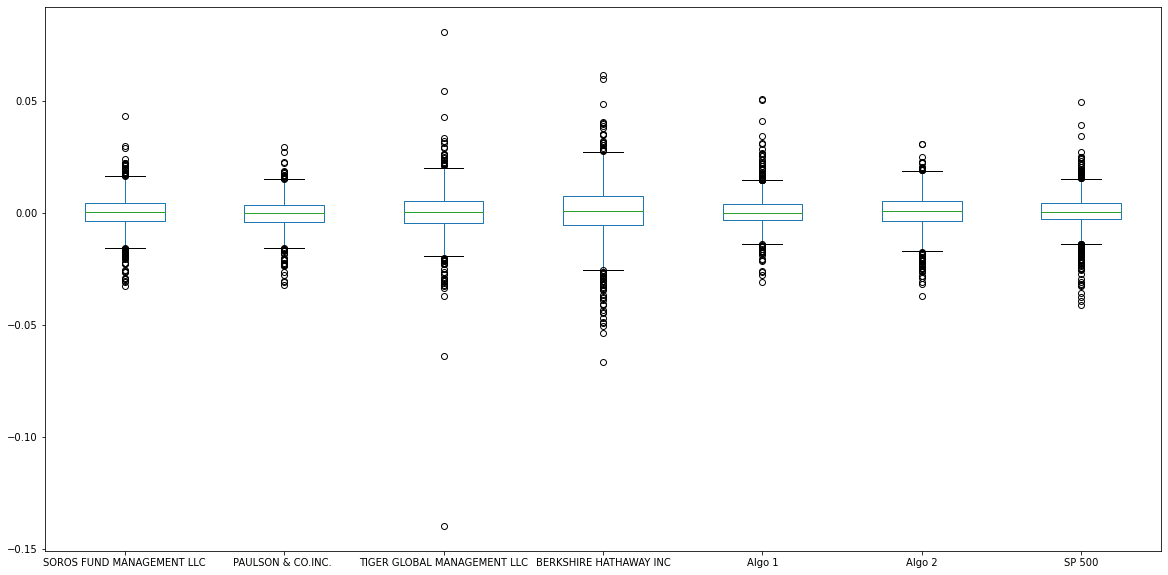

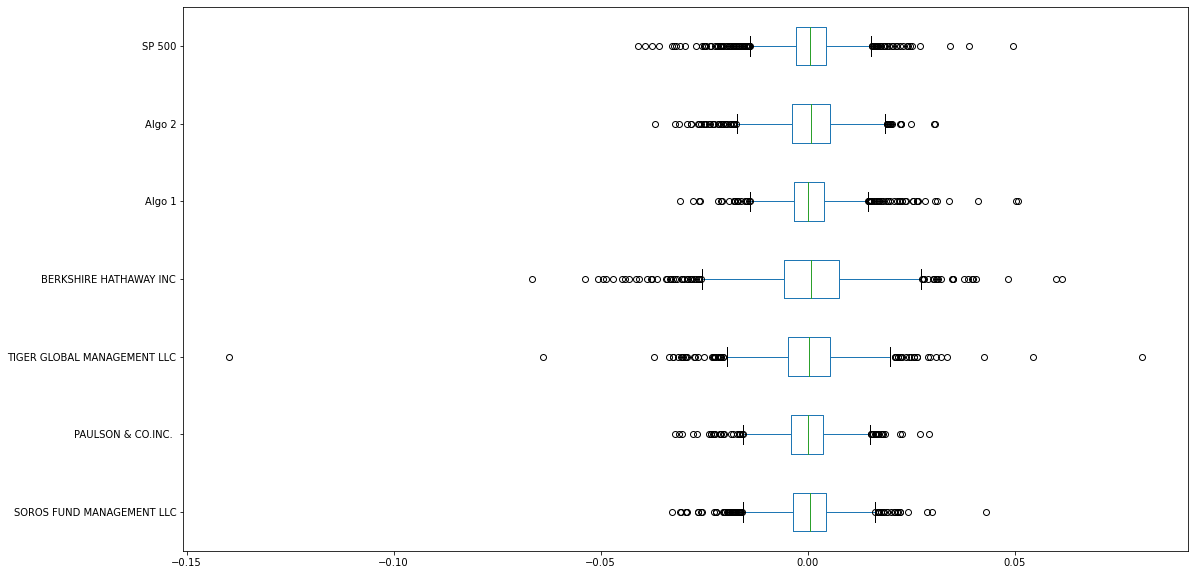

In [92]:
# Box plot to visually show risk
combined_df.plot(kind = "box", figsize = (20,10))
combined_df.plot(kind="box", figsize = (18,10), vert=False)

### Calculate Standard Deviations

In [103]:
# Calculate the daily standard deviations of all portfolios
combined_df_std = pd.DataFrame(combined_df.std()).rename(columns = {0:"std"})
combined_df_std

,std
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007023
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007620
Algo 2,0.008342
SP 500,0.008554


### Determine which portfolios are riskier than the S&P 500

In [114]:
# Calculate  the daily standard deviation of S&P 500
print("The daily standard deviation of S&P 500 are:")
print (daily_returns_sp500.std())
# Determine which portfolios are riskier than the S&P 500
higher_std = combined_df_std[combined_df_std["std"] > combined_df_std.loc["SP 500", "std"]]
higher_std

The daily standard deviation of S&P 500 are:
SP 500    0.008111
dtype: float64


,std
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919


TIGER GLOBAL MANAGEMENT LLC and BERKSHIRE HATHAWAY INC have higher volitility than SP500.

### Calculate the Annualized Standard Deviation

In [111]:
# Calculate the annualized standard deviation (252 trading days)
df_annual_std = combined_df_std*np.sqrt(252)
df_annual_std

,std
SOROS FUND MANAGEMENT LLC,0.125335
PAULSON & CO.INC.,0.111488
TIGER GLOBAL MANAGEMENT LLC,0.172936
BERKSHIRE HATHAWAY INC,0.205077
Algo 1,0.120967
Algo 2,0.132430
SP 500,0.135786


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

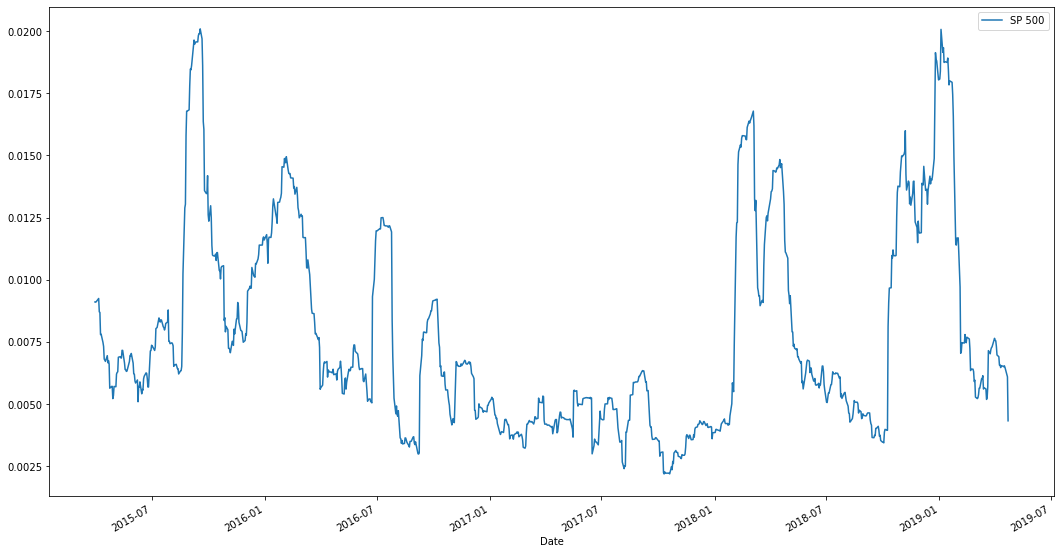

In [130]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
sp500_rolling_21 = combined_df[["SP 500"]].rolling(window = 21).std()
# Plot the rolling standard deviation
sp500_rolling_21.plot(figsize = (18,10))

### Calculate and plot the correlation

<AxesSubplot:xlabel='SP 500', ylabel='Algo 2'>

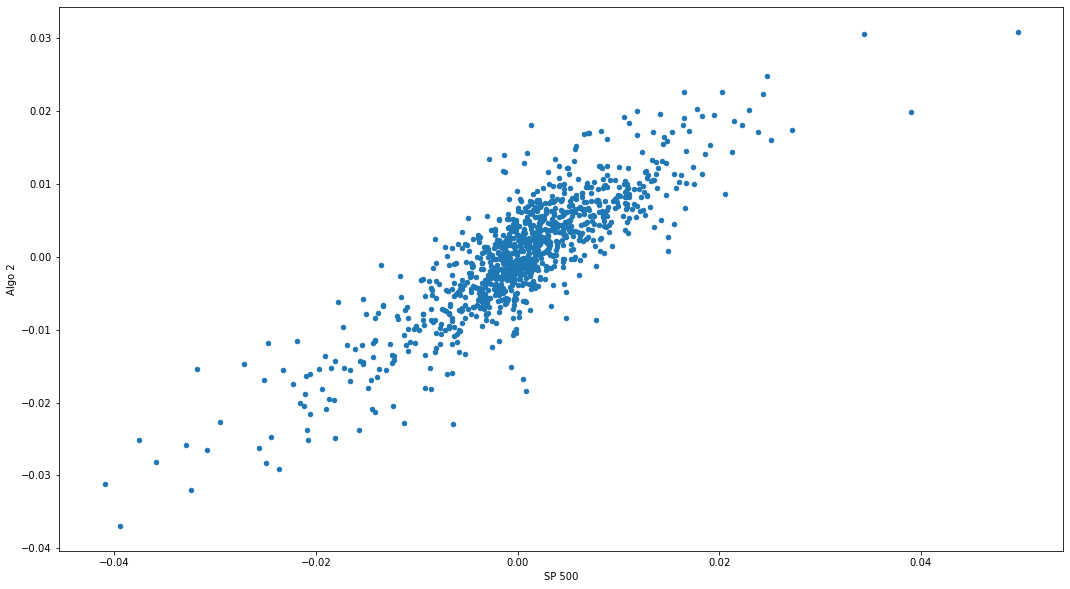

In [138]:
# Calculate the correlation
correlation_sp500 = pd.DataFrame(combined_df.corr()).loc[:,"SP 500"]
correlation_sp500[correlation_sp500==correlation_sp500[correlation_sp500<1].max()]
# Display de correlation matrix
combined_df.plot(kind="scatter", y = "Algo 2", x = "SP 500", figsize = (18,10))

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of BERKSHIRE HATHAWAY INC'}, xlabel='Date'>

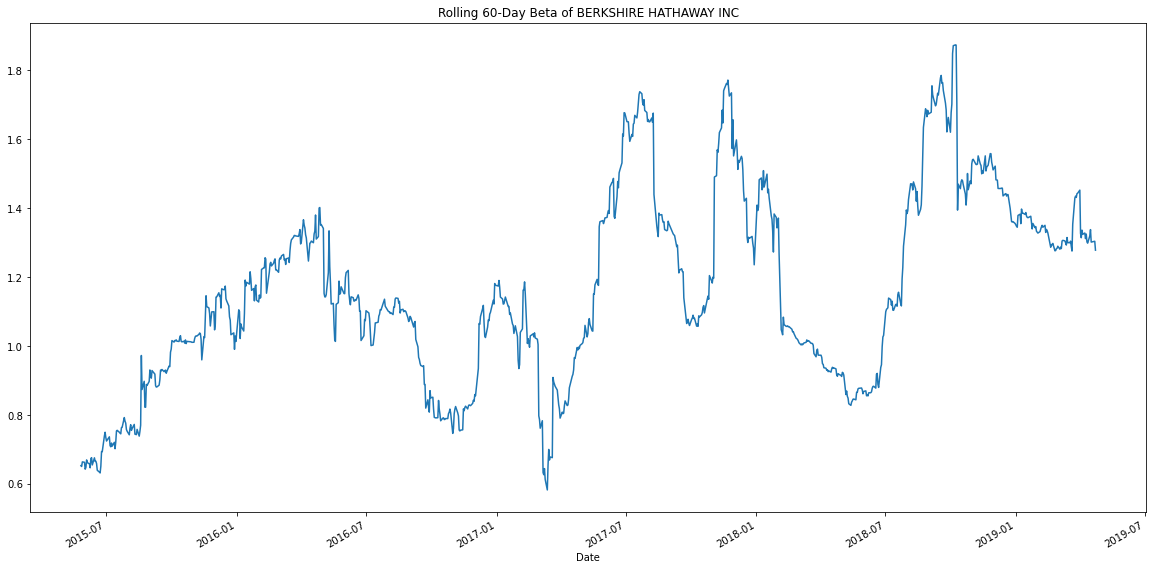

In [141]:
# Calculate covariance of a single portfolio
rolling_covariance = combined_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_df['SP 500'])
# Calculate variance of S&P 500
rolling_variance = combined_df['SP 500'].rolling(window=60).var()
# Computing beta
rolling_beta = rolling_covariance / rolling_variance
# Plot beta trend
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of BERKSHIRE HATHAWAY INC')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

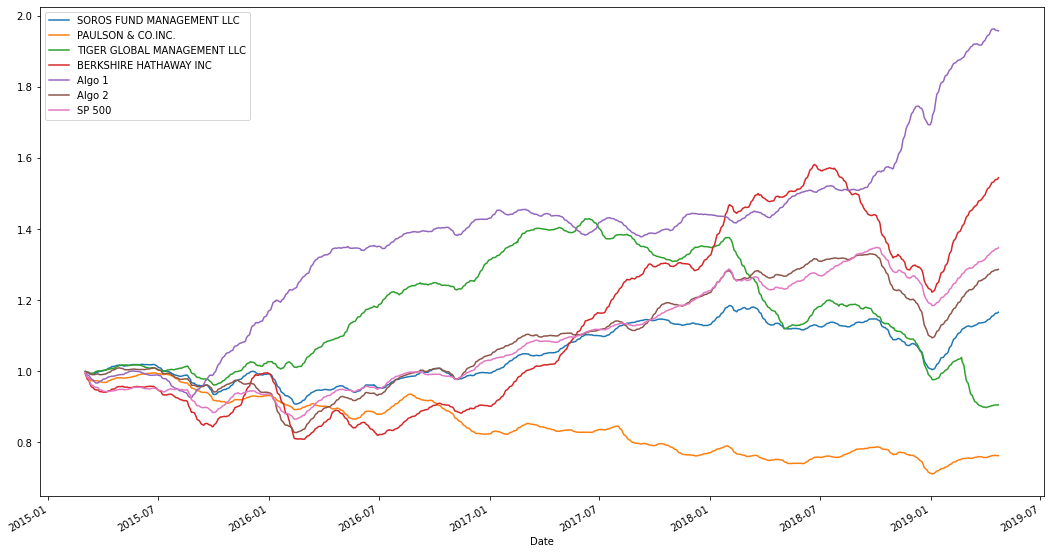

In [143]:
# Use `ewm` to calculate the rolling window
combined_df_ewm = combined_df.ewm(span = 21,adjust = False).mean()
(1+combined_df_ewm).cumprod().plot(figsize = (18,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [146]:
# Annualized Sharpe Ratios
sharpe_ratios = combined_df.mean()*252/(combined_df.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP 500                         0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

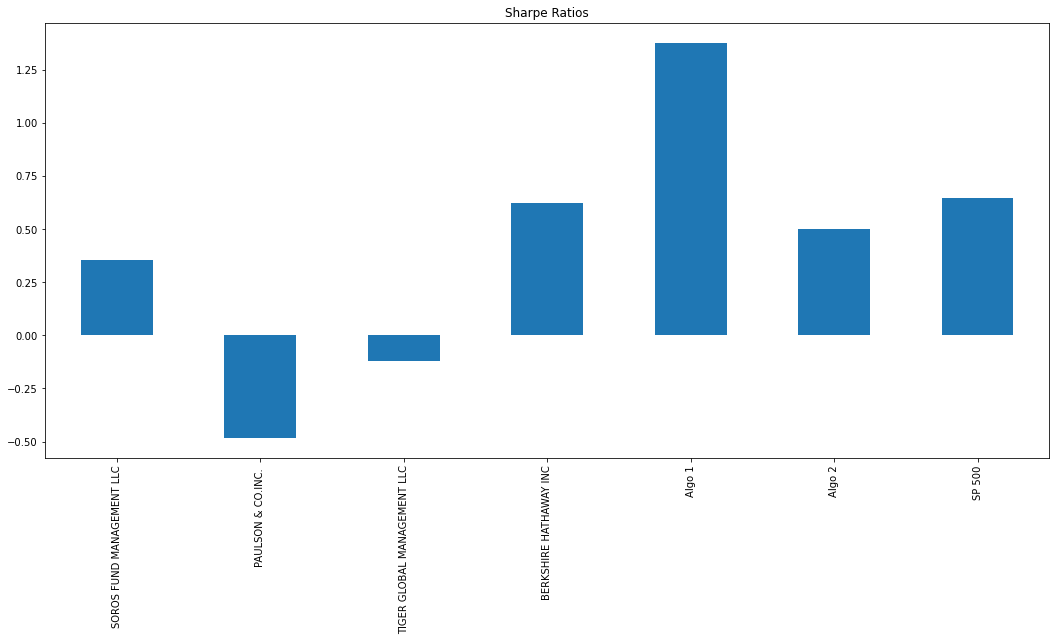

In [149]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratios",figsize = (18,8))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

On the basis of Sharpe Ratios, Algo 1 outperformed both the market as a whole as well as the Investment Mangement Firm portfolios. Algo 2, however, underperformed the market as a whole, as well as Berkshire Hathaway. Both Algo 1 and Algo 2 outperformed Soros Fund Managment, Paulson & Co. and Tiger Global Management.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [154]:
# Reading data from 1st stock
aapl_history = pd.read_csv(Path("Resources/AAPL.csv"), index_col="Date", 
                           parse_dates = True, infer_datetime_format= True)
aapl_history.rename(columns = {"Close":"aapl"}, inplace = True)
aapl_history.head()

,aapl
Date,
2019-12-02,42.72
2019-02-13,42.55
2019-02-14,42.70
2019-02-15,42.61
2019-02-19,42.73


In [158]:
# Reading data from 2nd stock
amzn_history = pd.read_csv(Path("Resources/AMZN.csv"), index_col="Date", 
                           parse_dates = True, infer_datetime_format= True)
amzn_history.rename(columns = {"Close":"amzn"}, inplace = True)
amzn_history.head()

,amzn
Date,
2019-12-02,1638.01
2019-02-13,1640.00
2019-02-14,1622.65
2019-02-15,1607.95
2019-02-19,1627.58


In [160]:
# Reading data from 3rd stock
goog_history = pd.read_csv(Path("Resources/GOOG.csv"), index_col="Date", 
                           parse_dates = True, infer_datetime_format= True)
goog_history.rename(columns = {"Close":"goog"}, inplace = True)
goog_history.head()

,goog
Date,
2019-12-02,1121.37
2019-02-13,1120.16
2019-02-14,1121.67
2019-02-15,1113.65
2019-02-19,1118.56


In [172]:
# Combine all stocks in a single DataFrame
total_stocks = pd.concat((aapl_history, amzn_history, goog_history), axis = 1, join= "inner")
total_stocks.sort_index(ascending = True, inplace = True)
total_stocks.head()

,aapl,amzn,goog
Date,,,
2019-01-03,43.74,1671.73,1140.99
2019-01-04,47.81,1814.19,1194.43
2019-01-05,52.63,1911.52,1168.08
2019-02-04,48.51,1813.98,1200.49
2019-02-05,52.29,1900.82,1162.61


In [174]:
# Reset Date index
total_stocks = total_stocks.reset_index()
total_stocks.head()

,Date,aapl,amzn,goog
0,2019-01-03,43.74,1671.73,1140.99
1,2019-01-04,47.81,1814.19,1194.43
2,2019-01-05,52.63,1911.52,1168.08
3,2019-02-04,48.51,1813.98,1200.49
4,2019-02-05,52.29,1900.82,1162.61


In [182]:
# Reorganize portfolio data by having a column per symbol


In [185]:
# Calculate daily returns
daily_total_stocks = pd.concat([aapl_history, amzn_history, goog_history], axis="columns", join="inner")
daily_total_stocks.dropna(inplace = True)
daily_total_stocks.head()
# Drop NAs
daily_total_stocks.dropna(inplace=True)
# # Display sample data
daily_total_stocks.head()

,aapl,amzn,goog
Date,,,
2019-12-02,42.72,1638.01,1121.37
2019-02-13,42.55,1640.00,1120.16
2019-02-14,42.70,1622.65,1121.67
2019-02-15,42.61,1607.95,1113.65
2019-02-19,42.73,1627.58,1118.56


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [197]:
# Set weights
weights = [1/3, 1/3, 1/3]
# Calculate portfolio return
my_portfolio_returns = daily_total_stocks.pct_change().dot(weights)
my_portfolio_returns.dropna(inplace=True)
# Display sample data
my_portfolio_returns.head()

Date
2019-02-13   -0.001281
2019-02-14   -0.001902
2019-02-15   -0.006106
2019-02-19    0.006478
2019-02-20   -0.000357
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [210]:
# Join your returns DataFrame to the original returns DataFrame
portfolio_returns = pd.concat((my_portfolio_returns,combined_df), axis = 1, join = "inner")
portfolio_returns.rename(columns = {0:"My Portfolio"}, inplace = True)
portfolio_returns

,My Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500
Date,,,,,,,,
2019-02-13,-0.001281,0.000000,0.000000,0.000000,0.000000,0.000058,0.001786,0.003024
2019-02-14,-0.001902,0.002795,0.001987,-0.004381,-0.003987,0.002285,-0.002618,-0.002652
2019-02-15,-0.006106,0.006410,0.007684,0.010389,0.005964,-0.001310,0.009946,0.010879
2019-02-19,0.006478,0.003437,0.000896,0.002877,0.005298,0.001755,0.006377,0.001499
2019-02-20,-0.000357,0.003650,-0.001690,0.005369,0.003833,-0.000007,0.001218,0.001777
2019-02-21,-0.007443,-0.001401,-0.004180,-0.001717,-0.006760,-0.000166,-0.000914,-0.003526
2019-02-22,0.010230,0.001011,0.004447,-0.139820,0.022029,0.002395,0.008799,0.006411
2019-02-25,0.002470,-0.002242,-0.003639,-0.009525,0.005358,0.009834,-0.000968,0.001232
2019-02-26,0.002569,-0.006030,-0.006118,-0.017294,-0.001617,0.005112,-0.002075,-0.000790


In [204]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio_returns.dropna(inplace=True)
portfolio_returns

,My Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500
Date,,,,,,,,
2019-02-13,-0.001281,0.000000,0.000000,0.000000,0.000000,0.000058,0.001786,0.003024
2019-02-14,-0.001902,0.002795,0.001987,-0.004381,-0.003987,0.002285,-0.002618,-0.002652
2019-02-15,-0.006106,0.006410,0.007684,0.010389,0.005964,-0.001310,0.009946,0.010879
2019-02-19,0.006478,0.003437,0.000896,0.002877,0.005298,0.001755,0.006377,0.001499
2019-02-20,-0.000357,0.003650,-0.001690,0.005369,0.003833,-0.000007,0.001218,0.001777
2019-02-21,-0.007443,-0.001401,-0.004180,-0.001717,-0.006760,-0.000166,-0.000914,-0.003526
2019-02-22,0.010230,0.001011,0.004447,-0.139820,0.022029,0.002395,0.008799,0.006411
2019-02-25,0.002470,-0.002242,-0.003639,-0.009525,0.005358,0.009834,-0.000968,0.001232
2019-02-26,0.002569,-0.006030,-0.006118,-0.017294,-0.001617,0.005112,-0.002075,-0.000790


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [206]:
# Calculate the annualized `std`
portfolio_annual_std = portfolio_returns*np.sqrt(252)
portfolio_annual_std

,My Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500
Date,,,,,,,,
2019-02-13,-0.020338,0.000000,0.000000,0.000000,0.000000,0.000928,0.028345,0.048004
2019-02-14,-0.030193,0.044377,0.031538,-0.069543,-0.063284,0.036280,-0.041564,-0.042093
2019-02-15,-0.096925,0.101762,0.121987,0.164918,0.094674,-0.020800,0.157884,0.172694
2019-02-19,0.102831,0.054559,0.014231,0.045674,0.084096,0.027858,0.101238,0.023792
2019-02-20,-0.005660,0.057944,-0.026822,0.085224,0.060855,-0.000106,0.019328,0.028211
2019-02-21,-0.118161,-0.022238,-0.066351,-0.027255,-0.107311,-0.002634,-0.014507,-0.055980
2019-02-22,0.162389,0.016051,0.070599,-2.219569,0.349698,0.038023,0.139684,0.101773
2019-02-25,0.039208,-0.035596,-0.057774,-0.151206,0.085058,0.156108,-0.015361,0.019554
2019-02-26,0.040777,-0.095727,-0.097114,-0.274535,-0.025674,0.081158,-0.032945,-0.012547


### Calculate and plot rolling `std` with 21-day window

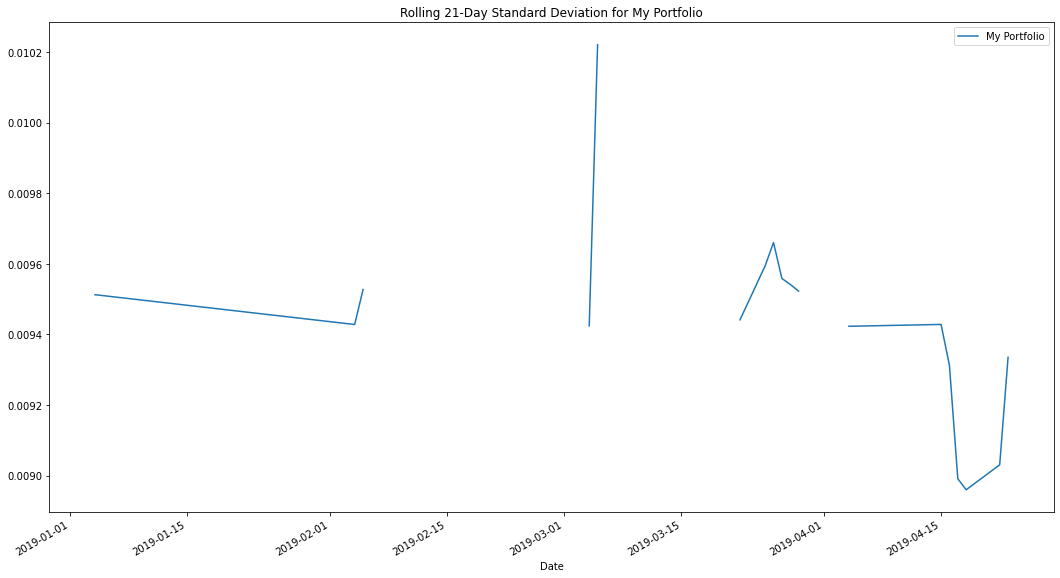

In [211]:
# Calculate rolling standard deviation
my_portfolio_rolling = portfolio_returns[["My Portfolio"]].rolling(window = 21).std()
# Plot rolling standard deviation
ax = my_portfolio_rolling.plot(figsize = (18,10), title = 'Rolling 21-Day Standard Deviation for My Portfolio')

### Calculate and plot the correlation

In [214]:
# Calculate and plot the correlation
correlation_my_portfolio = portfolio_returns.corr().loc[:,"My Portfolio"]
correlation_my_portfolio[
    correlation_my_portfolio==correlation_my_portfolio[correlation_my_portfolio<1].max()]
# correlation_my_portfolio.plot(kind="scatter", y = "Algo 2", x = "My Portfolio", figsize = (18,10))
correlation_my_portfolio.head()

My Portfolio                   1.000000
SOROS FUND MANAGEMENT LLC      0.376323
PAULSON & CO.INC.              0.153702
TIGER GLOBAL MANAGEMENT LLC   -0.024693
BERKSHIRE HATHAWAY INC         0.355701
Name: My Portfolio, dtype: float64

My portfolio is highly correlated to Algo 2.

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of my portfolio'}, xlabel='Date'>

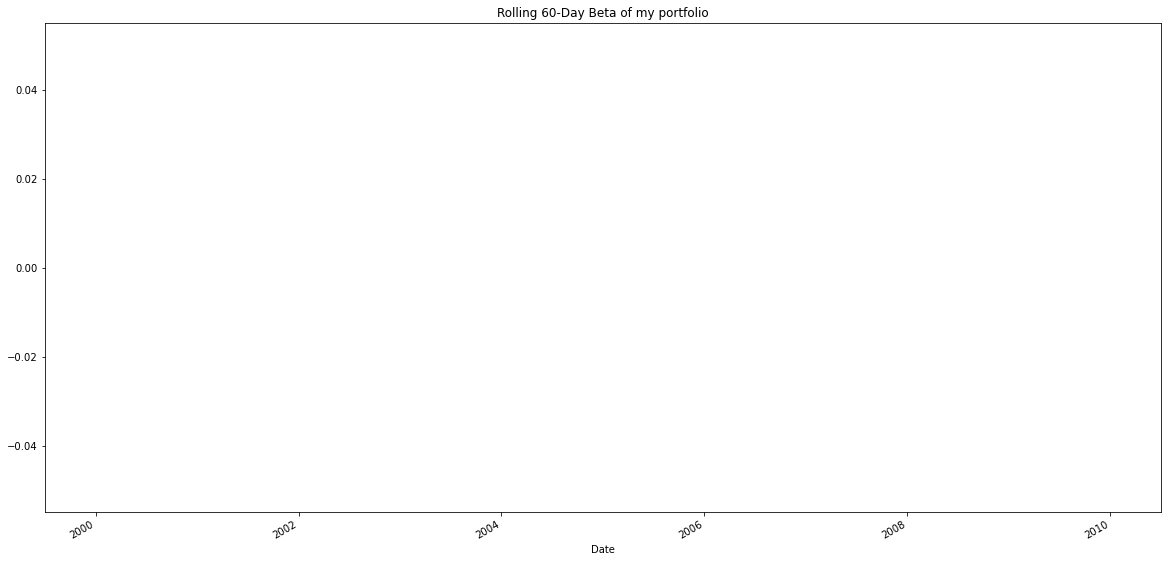

In [215]:
# Calculate and plot Beta
rolling_covariance = portfolio_returns['My Portfolio'].rolling(window=60).cov(portfolio_returns['SP 500'])
rolling_variance = portfolio_returns['SP 500'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of my portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [217]:
# Calculate Annualzied Sharpe Ratios
trading_days = portfolio_returns.count()
sharpe_ratios = portfolio_returns.mean()*trading_days/(portfolio_returns.std()*np.sqrt(trading_days))

<AxesSubplot:title={'center':'Sharpe Ratios'}>

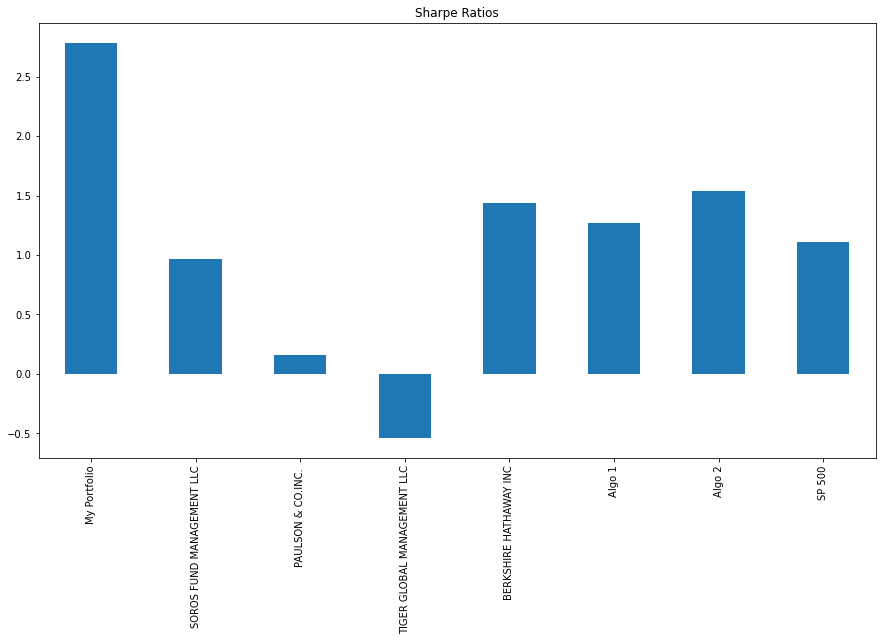

In [220]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = 'bar', title = "Sharpe Ratios", figsize=(15, 8))

### How does your portfolio do?

Write your answer here!

My Portfolio beating all other portfolios.